In [311]:
### source code
##  https://www.youtube.com/watch?v=s3CnE2tqQdo

In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [313]:
pip install pandas-datareader


Note: you may need to restart the kernel to use updated packages.


In [314]:
# library to scrap the data from yahoo finance website
import pandas_datareader as data

In [315]:
# taking bigger timeframe of dataset to get more accuracy
start ="2010-01-01"
end = "2021-12-31"


In [316]:
## data of tatapower of starting year 2010
df = data.DataReader('TATAPOWER.NS','yahoo',start,end)
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,135.097580,133.577682,133.751373,134.079483,3172720.0,104.819443
2010-01-05,137.997452,134.422058,134.716400,136.033646,4254349.0,106.347153
2010-01-06,144.366562,136.067413,136.067413,142.344849,8747201.0,111.281059
2010-01-07,144.945572,139.444977,142.822540,142.933517,5495560.0,111.741264
2010-01-08,144.077057,141.355713,143.305054,142.856308,3916987.0,111.680901


In [317]:
## to see the last year data of year 2021
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,217.750000,213.800003,216.600006,217.350006,15870056.0,217.350006
2021-12-28,222.199997,218.500000,218.699997,221.600006,19058757.0,221.600006
2021-12-29,223.250000,218.850006,221.000000,219.449997,14504319.0,219.449997
2021-12-30,221.000000,217.050003,218.699997,218.350006,14315067.0,218.350006
2021-12-31,222.000000,218.350006,218.899994,220.949997,12737974.0,220.949997


In [318]:
## change of index column into normal column for date
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,135.097580,133.577682,133.751373,134.079483,3172720.0,104.819443
1,2010-01-05,137.997452,134.422058,134.716400,136.033646,4254349.0,106.347153
2,2010-01-06,144.366562,136.067413,136.067413,142.344849,8747201.0,111.281059
3,2010-01-07,144.945572,139.444977,142.822540,142.933517,5495560.0,111.741264
4,2010-01-08,144.077057,141.355713,143.305054,142.856308,3916987.0,111.680901


In [319]:
## drop the extra column which is not required like date and adj_close
df= df.drop(['Date','Adj Close'], axis =1)
df.head()

,High,Low,Open,Close,Volume
0,135.097580,133.577682,133.751373,134.079483,3172720.0
1,137.997452,134.422058,134.716400,136.033646,4254349.0
2,144.366562,136.067413,136.067413,142.344849,8747201.0
3,144.945572,139.444977,142.822540,142.933517,5495560.0
4,144.077057,141.355713,143.305054,142.856308,3916987.0


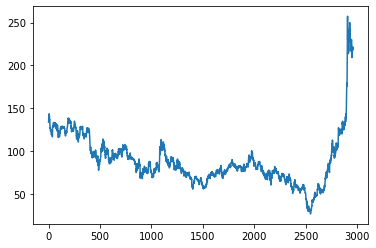

In [320]:
## we are interested in close column only, 
## so this is the graph showing closing of tatapower stocks
plt.plot(df.Close)

In [321]:
df

,High,Low,Open,Close,Volume
0,135.097580,133.577682,133.751373,134.079483,3172720.0
1,137.997452,134.422058,134.716400,136.033646,4254349.0
2,144.366562,136.067413,136.067413,142.344849,8747201.0
3,144.945572,139.444977,142.822540,142.933517,5495560.0
4,144.077057,141.355713,143.305054,142.856308,3916987.0
...,...,...,...,...,...
2956,217.750000,213.800003,216.600006,217.350006,15870056.0
2957,222.199997,218.500000,218.699997,221.600006,19058757.0
2958,223.250000,218.850006,221.000000,219.449997,14504319.0
2959,221.000000,217.050003,218.699997,218.350006,14315067.0


In [322]:
## we will use rolling function here to calculate moving average
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2956    185.405501
2957    186.295501
2958    187.173501
2959    188.011501
2960    188.869501
Name: Close, Length: 2961, dtype: float64

## what we get in previous output is starting 100 null values because it should have previous 100 values for getting mean.

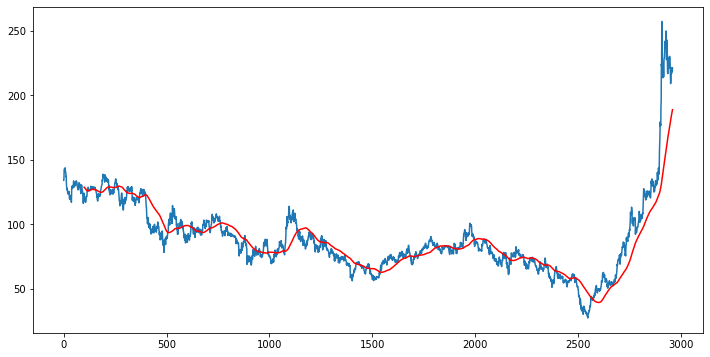

In [323]:
## plot this above moving average into the closing graph of 100 days moving average

plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')

In [324]:
##  200 days moving averages 
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2956    148.26100
2957    148.83225
2958    149.38425
2959    149.94100
2960    150.50900
Name: Close, Length: 2961, dtype: float64

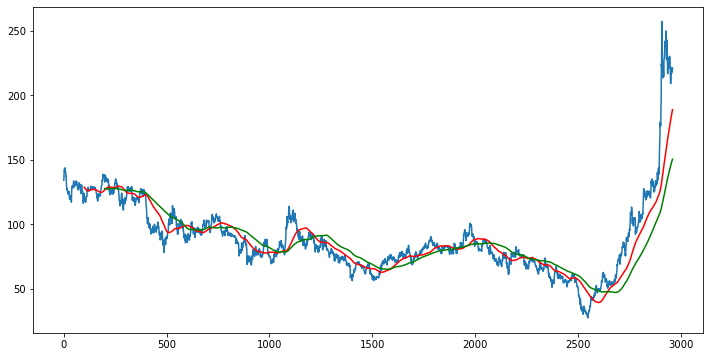

In [325]:
## creating a chart to compare 100 days and 200 days moving average.

plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')
plt.plot(ma200,'green')


In [326]:
df.shape

(2961, 5)

## our main focus is closing column, so we will be working on that column only

In [327]:
## splitting the data into training(70%)and testing(30%) data.

# training data starts from 0 to 70 percent of the data
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])

# training data starts after initial 70 percent to the remaing complete data
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2072, 1)
(889, 1)


In [328]:
## training data starting from 0 index, contains 70% of the data
data_training.head()

,Close
0,134.079483
1,136.033646
2,142.344849
3,142.933517
4,142.856308


In [329]:
## next tesing data after 70% data from starting 
data_testing.head()

,Close
2072,82.300003
2073,83.500000
2074,82.449997
2075,81.300003
2076,79.599998


In [330]:
## we need to scaling down the data between 0 and 1 using minmaxscaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [331]:
## converting the training data into array.

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.88937158],
       [0.91167349],
       [0.98370021],
       ...,
       [0.24308657],
       [0.23167406],
       [0.28588351]])

In [332]:
data_training_array.shape

(2072, 1)

In [333]:
## divide the data into x_train and y_train and create a empty list
x_train =[]
y_train =[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [334]:
## ML Model

!!pip install keras

['Requirement already satisfied: keras in c:\\users\\asus\\anaconda3\\lib\\site-packages (2.9.0)']

In [335]:
!! pip install tensorflow

['Requirement already satisfied: tensorflow in c:\\users\\asus\\anaconda3\\lib\\site-packages (2.9.1)',
 'Requirement already satisfied: tensorboard<2.10,>=2.9 in c:\\users\\asus\\anaconda3\\lib\\site-packages (from tensorflow) (2.9.0)',
 'Requirement already satisfied: wrapt>=1.11.0 in c:\\users\\asus\\anaconda3\\lib\\site-packages (from tensorflow) (1.12.1)',
 'Requirement already satisfied: flatbuffers<2,>=1.12 in c:\\users\\asus\\anaconda3\\lib\\site-packages (from tensorflow) (1.12)',
 'Requirement already satisfied: numpy>=1.20 in c:\\users\\asus\\anaconda3\\lib\\site-packages (from tensorflow) (1.20.3)',
 'Requirement already satisfied: six>=1.12.0 in c:\\users\\asus\\anaconda3\\lib\\site-packages (from tensorflow) (1.16.0)',
 'Requirement already satisfied: keras<2.10.0,>=2.9.0rc0 in c:\\users\\asus\\anaconda3\\lib\\site-packages (from tensorflow) (2.9.0)',
 'Requirement already satisfied: gast<=0.4.0,>=0.2.1 in c:\\users\\asus\\anaconda3\\lib\\site-packages (from tensorflow) (

In [336]:

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [337]:
model = Sequential()
model.add(LSTM(units =50,activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units =60,activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))




model.add(LSTM(units =80,activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))




model.add(LSTM(units =120,activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units =1))



In [338]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_5 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_6 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_7 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_10 (LSTM)              (None, 120)              

In [339]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train,y_train, epochs = 50)

Epoch 1/50
62/62 [==============================] - 10s 113ms/step - loss: 0.0304
Epoch 2/50
62/62 [==============================] - 7s 112ms/step - loss: 0.0098
Epoch 3/50
62/62 [==============================] - 7s 115ms/step - loss: 0.0084
Epoch 4/50
62/62 [==============================] - 7s 113ms/step - loss: 0.0083
Epoch 5/50
62/62 [==============================] - 7s 114ms/step - loss: 0.0073
Epoch 6/50
62/62 [==============================] - 7s 121ms/step - loss: 0.0073
Epoch 7/50
62/62 [==============================] - 8s 122ms/step - loss: 0.0068
Epoch 8/50
62/62 [==============================] - 8s 130ms/step - loss: 0.0063
Epoch 9/50
62/62 [==============================] - 10s 161ms/step - loss: 0.0062
Epoch 10/50
62/62 [==============================] - 7s 120ms/step - loss: 0.0058
Epoch 11/50
62/62 [==============================] - 8s 123ms/step - loss: 0.0054
Epoch 12/50
62/62 [==============================] - 7s 121ms/step - loss: 0.0056
Epoch 13/50
62/62 [====

In [340]:
model.save('keras_model.h5')

In [341]:
data_testing.head()

,Close
2072,82.300003
2073,83.500000
2074,82.449997
2075,81.300003
2076,79.599998


In [342]:
data_training.tail(100)

,Close
1972,93.500000
1973,97.150002
1974,99.699997
1975,100.800003
1976,99.599998
...,...
2067,78.800003
2068,77.849998
2069,77.449997
2070,76.449997


In [343]:
past_100_days = data_training.tail(100)


In [344]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [345]:
final_df.head()

,Close
0,93.500000
1,97.150002
2,99.699997
3,100.800003
4,99.599998


In [346]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.2878261 ],
       [0.30369568],
       [0.31478261],
       [0.31956525],
       [0.31434784],
       [0.31413047],
       [0.31543479],
       [0.31000001],
       [0.30847828],
       [0.31413047],
       [0.31195655],
       [0.30717392],
       [0.28847829],
       [0.28652174],
       [0.2752174 ],
       [0.28217392],
       [0.28173914],
       [0.28347828],
       [0.28043481],
       [0.27239131],
       [0.27282612],
       [0.2752174 ],
       [0.26826089],
       [0.27130435],
       [0.25000003],
       [0.25086958],
       [0.24130438],
       [0.24956522],
       [0.25108699],
       [0.25108699],
       [0.25847828],
       [0.26000001],
       [0.25630436],
       [0.2580435 ],
       [0.25565218],
       [0.25695654],
       [0.25673914],
       [0.25043481],
       [0.25413045],
       [0.25478263],
       [0.25369567],
       [0.24869567],
       [0.24782612],
       [0.23847828],
       [0.23673915],
       [0.22565218],
       [0.22869567],
       [0.229

In [347]:
input_data.shape

(989, 1)

In [348]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [349]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(889, 100, 1)
(889,)


In [350]:
## making predictions

y_predicted = model.predict(x_test)



28/28 [==============================] - 1s 34ms/step


In [351]:
y_predicted.shape

(889, 1)

In [352]:
y_test

array([0.23913046, 0.24434784, 0.23978261, 0.23478264, 0.22739131,
       0.21695652, 0.22391307, 0.22086957, 0.22195653, 0.22021739,
       0.22217393, 0.21956524, 0.21630438, 0.21739133, 0.21217392,
       0.20739132, 0.2004348 , 0.20239131, 0.20543481, 0.21239132,
       0.21326088, 0.20782609, 0.19391306, 0.19282611, 0.19978262,
       0.1954348 , 0.19521739, 0.19456524, 0.19108697, 0.19326088,
       0.19956522, 0.19891307, 0.19521739, 0.18347827, 0.18630437,
       0.18108696, 0.18956524, 0.18565219, 0.17782609, 0.17630435,
       0.17717394, 0.17608698, 0.17608698, 0.18934783, 0.19369566,
       0.20239131, 0.20543481, 0.19891307, 0.19413043, 0.19586957,
       0.19369566, 0.18695655, 0.18326087, 0.18521741, 0.18282609,
       0.1802174 , 0.1802174 , 0.17326089, 0.17978263, 0.18586959,
       0.1954348 , 0.19456524, 0.19326088, 0.21000001, 0.20673914,
       0.21565219, 0.21217392, 0.21478261, 0.22130435, 0.2002174 ,
       0.20695654, 0.20760872, 0.20826087, 0.20217394, 0.205  

In [353]:
y_predicted

array([[0.24934945],
       [0.24944179],
       [0.25242165],
       [0.25702098],
       [0.26129988],
       [0.26389033],
       [0.26408973],
       [0.26193666],
       [0.25816587],
       [0.25393173],
       [0.2501043 ],
       [0.24741349],
       [0.24576527],
       [0.2449312 ],
       [0.24463235],
       [0.24441442],
       [0.24386087],
       [0.24264991],
       [0.24087757],
       [0.2388967 ],
       [0.2373814 ],
       [0.23690525],
       [0.23737775],
       [0.23780522],
       [0.23758046],
       [0.23672311],
       [0.23543505],
       [0.23396052],
       [0.23252131],
       [0.23120955],
       [0.23013902],
       [0.22962198],
       [0.22978225],
       [0.23039308],
       [0.2307854 ],
       [0.23065658],
       [0.22995749],
       [0.22892994],
       [0.2277879 ],
       [0.2265734 ],
       [0.22529045],
       [0.22398837],
       [0.22273129],
       [0.22159708],
       [0.22102931],
       [0.22162867],
       [0.22396831],
       [0.228

In [354]:
scaler.scale_

array([0.00434783])

In [355]:
scale_factor = 1/0.00434783
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

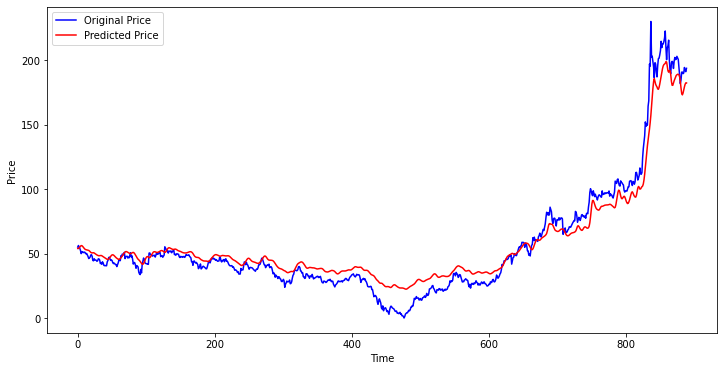

In [308]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label ='Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

